In [2]:
from google.colab import output

# Standard Libraries
import os
import numpy as np 
import pandas as pd 
import random as rn
import matplotlib.pyplot as plt

# NumPy Libraries
from numpy import mean
from numpy import std

# SkLearn Libraries
import sklearn
from sklearn.utils import check_array
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn import datasets, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

output.clear()      # clear output

## Preprocessing the data

In [21]:
# Gather data
batch_size = 32

digits = datasets.load_digits()

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [25]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


## SVM Model

In [52]:
'''
gamma: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
c: Regularization parameter
kernel: Specifies the kernel type to be used in the algorithm
'''

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001, probability=True)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Testing Accuracy : 0.9688542825361512


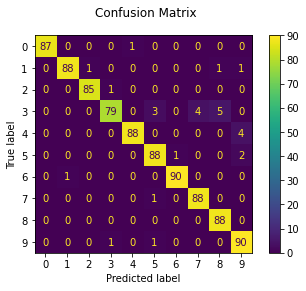

In [54]:
print("Testing Accuracy : " + str(accuracy_score(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [68]:
svm_probability = clf.predict_proba(X_test)
svm_probability.shape

(899, 10)

## Decision Tree

In [58]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

Testing Accuracy : 0.7530589543937709


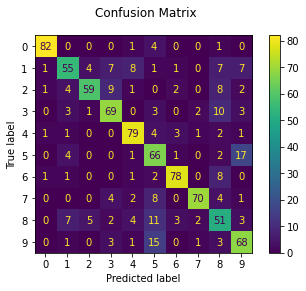

In [60]:
print("Testing Accuracy : " + str(accuracy_score(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [67]:
decision_tree_probability = clf.predict_proba(X_test)
decision_tree_probability.shape

(899, 10)

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, y_train)
predicted = logisticRegr.predict(X_test)

output.clear()    # get rid of warning messages

Testing Accuracy : 0.9299221357063404


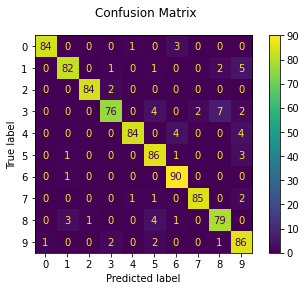

In [64]:
print("Testing Accuracy : " + str(accuracy_score(y_test, predicted)))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()


In [66]:
lr_probability = clf.predict_proba(X_test)
lr_probability.shape

(899, 10)

## Ensemble: Soft Voting


In [73]:
sum1 = np.add(svm_probability, decision_tree_probability)
sum2 = np.add(sum1,lr_probability)
y_pred = sum2.argmax(axis=1)
y_pred.shape

(899,)

Accuracy: 0.9655172413793104


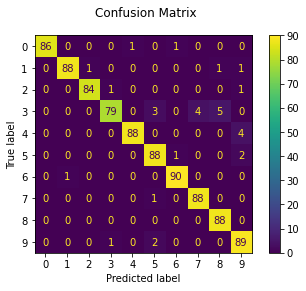

In [77]:
ens_score = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(ens_score))
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
# print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()
